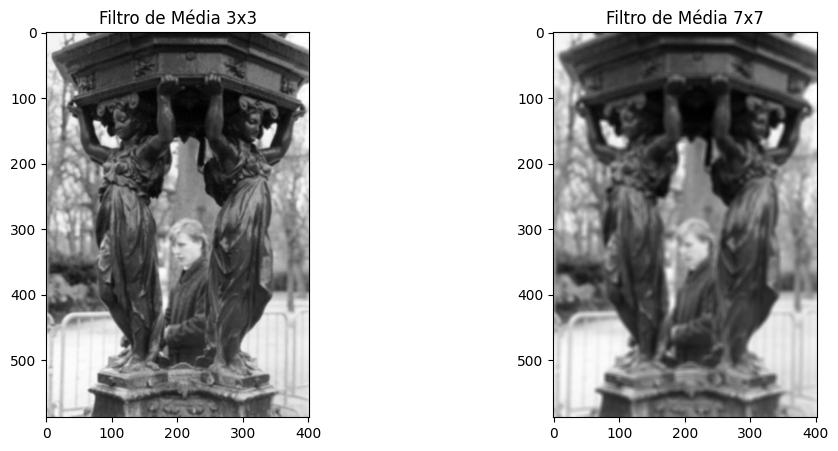

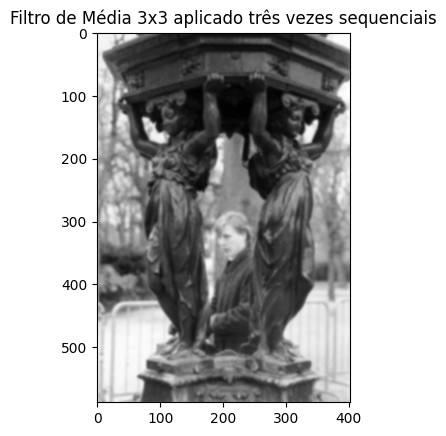

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

# Carregar a imagem
img1 = cv2.imread("sta2.png", cv2.IMREAD_GRAYSCALE)

# Definir tamanhos de máscaras
tamanhos_mascaras = [3, 7]

# Criar uma figura com subplots para as imagens
plt.figure(figsize=(12, 5))

# Aplicar filtro de média para diferentes tamanhos de máscaras
for i, tamanho_mascara in enumerate(tamanhos_mascaras):
    # Criar a máscara de média
    mascara = np.ones((tamanho_mascara, tamanho_mascara), dtype=np.float32) / (tamanho_mascara * tamanho_mascara)

    # Aplicar a convolução para obter a imagem filtrada
    img_filtrada = cv2.filter2D(img1, -1, mascara)

    plt.subplot(1, len(tamanhos_mascaras), i+1)
    plt.imshow(img_filtrada, cmap='gray')
    plt.title(f"Filtro de Média {tamanho_mascara}x{tamanho_mascara}")

plt.show()

# Aplicar o filtro de média 3x3 três vezes sequencialmente
# Utilizar a convolução múltipla para aplicar o filtro três vezes
mascara_3x3 = np.ones((3, 3), dtype=np.float32) / 9
img_filtrada_sequencial = cv2.filter2D(img1, -1, mascara_3x3)
img_filtrada_sequencial = cv2.filter2D(img_filtrada_sequencial, -1, mascara_3x3)
img_filtrada_sequencial = cv2.filter2D(img_filtrada_sequencial, -1, mascara_3x3)

plt.figure()
plt.imshow(img_filtrada_sequencial, cmap='gray')
plt.title("Filtro de Média 3x3 aplicado três vezes sequenciais")
plt.show()


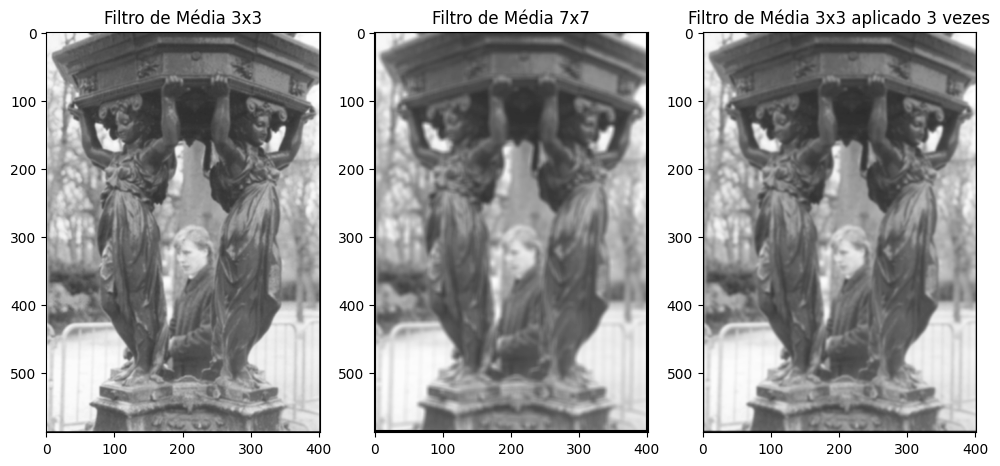

In [2]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

# Função para aplicar o filtro de média sem usar a função de filtro médio de biblioteca
def aplicar_filtro_media(imagem, tamanho_mascara):
    altura, largura = imagem.shape
    mascara = np.ones((tamanho_mascara, tamanho_mascara), np.float32) / (tamanho_mascara * tamanho_mascara)

    # Aplica o filtro de média
    imagem_filtrada = np.zeros((altura, largura), dtype=np.uint8)
    margem = tamanho_mascara // 2

    for i in range(margem, altura - margem):
        for j in range(margem, largura - margem):
            regiao = imagem[i - margem:i + margem + 1, j - margem:j + margem + 1]
            valor = np.sum(regiao * mascara)
            imagem_filtrada[i, j] = int(valor)

    return imagem_filtrada

# Carrega a imagem
img1 = cv2.imread("sta2.png", cv2.IMREAD_GRAYSCALE)

# Aplica filtro de média para máscara 3x3
img_media_3x3 = aplicar_filtro_media(img1, 3)

# Aplica filtro de média para máscara 7x7
img_media_7x7 = aplicar_filtro_media(img1, 7)

# Aplica filtro de média 3 vezes sequenciais com máscara 3x3
img_media_3x3_3vezes = img1.copy()
for i in range(3):
    img_media_3x3_3vezes = aplicar_filtro_media(img_media_3x3_3vezes, 3)

# Exibe as imagens
plt.figure(figsize=(12, 12))
plt.subplot(131), plt.imshow(img_media_3x3, cmap='gray'), plt.title('Filtro de Média 3x3')
plt.subplot(132), plt.imshow(img_media_7x7, cmap='gray'), plt.title('Filtro de Média 7x7')
plt.subplot(133), plt.imshow(img_media_3x3_3vezes, cmap='gray'), plt.title('Filtro de Média 3x3 aplicado 3 vezes')
plt.show()


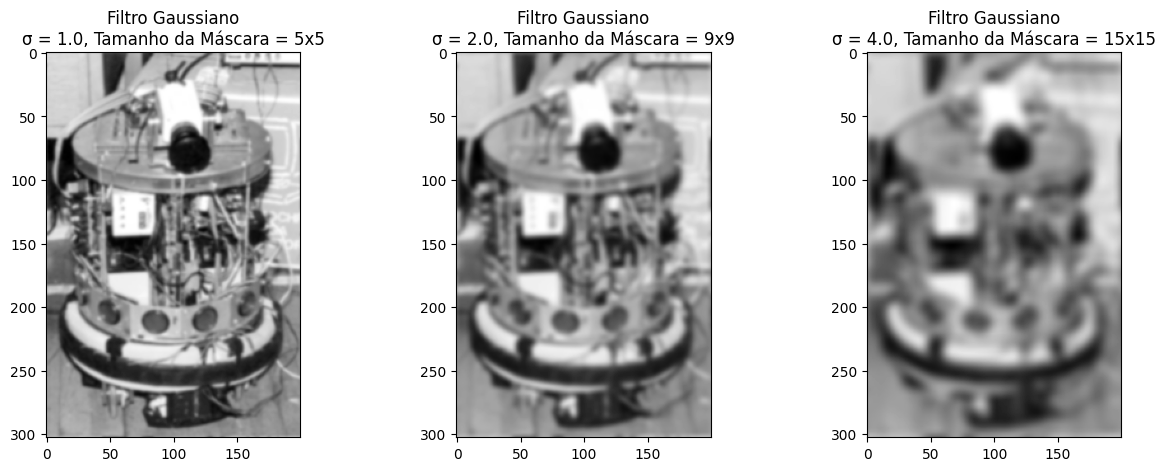

In [4]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import convolve2d

# Função para criar um kernel Gaussiano
def criar_kernel_gaussiano(sigma, tamanho):
    centro = tamanho // 2
    x, y = np.mgrid[0 - centro : tamanho - centro, 0 - centro : tamanho - centro]
    kernel = np.exp(-(x**2 + y**2) / (2 * sigma**2))
    return kernel / kernel.sum()

# Função para aplicar o filtro Gaussiano
def aplicar_filtro_gaussiano(imagem, sigma, tamanho):
    kernel = criar_kernel_gaussiano(sigma, tamanho)
    imagem_filtrada = convolve2d(imagem, kernel, mode='same', boundary='wrap')
    return imagem_filtrada.astype(np.uint8)

# Carregar a imagem
img2 = cv2.imread("ben2.png", cv2.IMREAD_GRAYSCALE)

# Definir os valores de sigma e os tamanhos de máscara correspondentes
valores_sigma = [1.0, 2.0, 4.0]
tamanhos_mascara = [5, 9, 15]

# Criar uma figura com subplots para as imagens
plt.figure(figsize=(15, 5))

# Aplicar o filtro Gaussiano para diferentes valores de sigma e tamanhos de máscara
for i, (sigma, tamanho) in enumerate(zip(valores_sigma, tamanhos_mascara)):
    img_filtrada = aplicar_filtro_gaussiano(img2, sigma, tamanho)

    plt.subplot(1, len(valores_sigma), i+1)
    plt.imshow(img_filtrada, cmap='gray')
    plt.title(f"Filtro Gaussiano\nσ = {sigma}, Tamanho da Máscara = {tamanho}x{tamanho}")

plt.show()


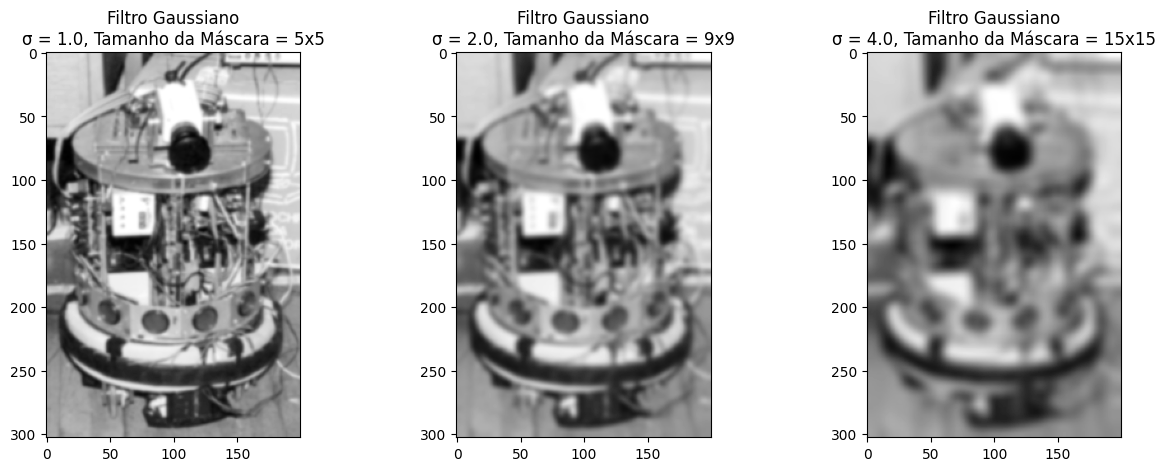

In [5]:
import cv2
import matplotlib.pyplot as plt

# Função para aplicar o filtro Gaussiano
def aplicar_filtro_gaussiano(imagem, sigma, kernel_size):
    imagem_filtrada = cv2.GaussianBlur(imagem, (kernel_size, kernel_size), sigmaX=sigma, sigmaY=sigma)
    return imagem_filtrada

# Carregar a imagem
img2 = cv2.imread("ben2.png", cv2.IMREAD_GRAYSCALE)

# Definir os valores de sigma e os tamanhos de máscara correspondentes
valores_sigma = [1.0, 2.0, 4.0]
tamanhos_mascara = [5, 9, 15]

# Criar uma figura com subplots para as imagens
plt.figure(figsize=(15, 5))

# Aplicar o filtro Gaussiano para diferentes valores de sigma e tamanhos de máscara
for i, (sigma, kernel_size) in enumerate(zip(valores_sigma, tamanhos_mascara)):
    img_filtrada = aplicar_filtro_gaussiano(img2, sigma, kernel_size)

    plt.subplot(1, len(valores_sigma), i+1)
    plt.imshow(img_filtrada, cmap='gray')
    plt.title(f"Filtro Gaussiano\nσ = {sigma}, Tamanho da Máscara = {kernel_size}x{kernel_size}")

plt.show()


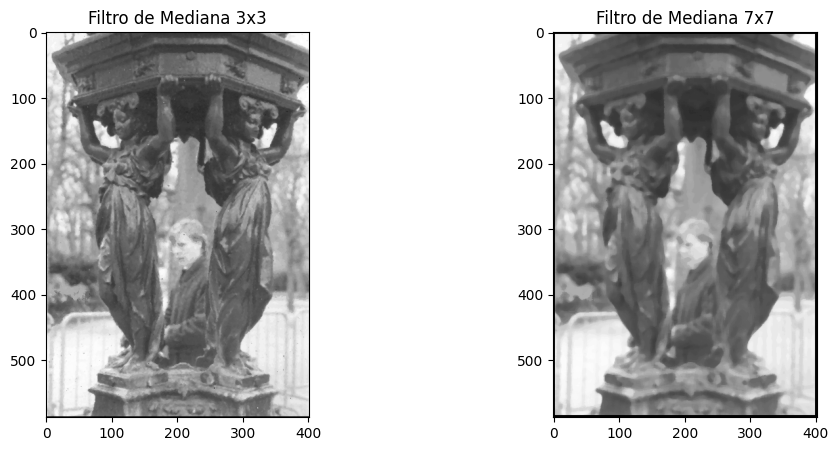

In [6]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

# Função para aplicar o filtro de mediana manualmente
def aplicar_filtro_mediana(imagem, tamanho_mascara):
    altura, largura = imagem.shape
    imagem_filtrada = np.zeros((altura, largura), dtype=np.uint8)
    margem = tamanho_mascara // 2

    for i in range(margem, altura - margem):
        for j in range(margem, largura - margem):
            regiao = imagem[i - margem:i + margem + 1, j - margem:j + margem + 1]
            valor_mediana = np.median(regiao)
            imagem_filtrada[i, j] = int(valor_mediana)

    return imagem_filtrada

# Carregar a imagem com ruído salt and pepper
img3 = cv2.imread("sta2noi1.png", cv2.IMREAD_GRAYSCALE)

# Aplicar o filtro de mediana para máscara 3x3
img_mediana_3x3 = aplicar_filtro_mediana(img3, 3)

# Aplicar o filtro de mediana para máscara 7x7
img_mediana_7x7 = aplicar_filtro_mediana(img3, 7)

# Exibir as imagens
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1), plt.imshow(img_mediana_3x3, cmap='gray'), plt.title('Filtro de Mediana 3x3')
plt.subplot(1, 2, 2), plt.imshow(img_mediana_7x7, cmap='gray'), plt.title('Filtro de Mediana 7x7')
plt.show()


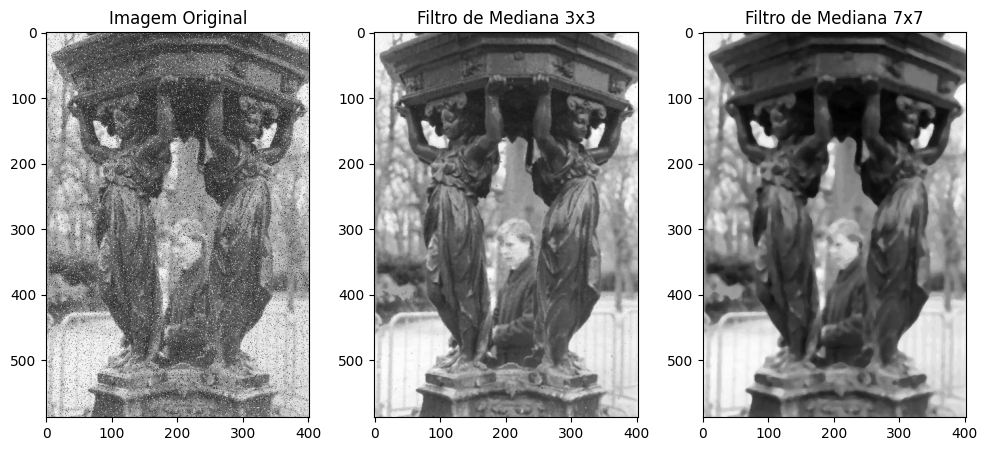

In [7]:
import cv2
import matplotlib.pyplot as plt

# Carregar a imagem
img3 = cv2.imread("sta2noi1.png", cv2.IMREAD_GRAYSCALE)

# Aplicar o filtro de mediana com máscara 3x3
img_mediana_3x3 = cv2.medianBlur(img3, 3)

# Aplicar o filtro de mediana com máscara 7x7
img_mediana_7x7 = cv2.medianBlur(img3, 7)

# Criar uma figura com subplots para as imagens
plt.figure(figsize=(12, 5))

# Exibir a imagem original
plt.subplot(1, 3, 1)
plt.imshow(img3, cmap='gray')
plt.title('Imagem Original')

# Exibir a imagem com filtro de mediana 3x3
plt.subplot(1, 3, 2)
plt.imshow(img_mediana_3x3, cmap='gray')
plt.title('Filtro de Mediana 3x3')

# Exibir a imagem com filtro de mediana 7x7
plt.subplot(1, 3, 3)
plt.imshow(img_mediana_7x7, cmap='gray')
plt.title('Filtro de Mediana 7x7')

plt.show()
